# Analyzing temperature and humidity data
## Objectives

- Data wrangling
- Data visualization
- Saving figures

In [1]:
import datetime
import os
from glob import glob

PATH = ".\..\Data"
EXT = "*.xls"

all_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]

print ("The available dataset:")
for x in all_files:
    print(x)    

The available dataset:
.\..\Data\1 RHT20 11-04-20.xls
.\..\Data\10 RHT20 11-04-20.xls
.\..\Data\2 RHT20 11-04-20.xls
.\..\Data\3 RHT20 11-04-20.xls
.\..\Data\4 RHT20 11-04-20.xls
.\..\Data\5 RHT20 11-04-20.xls
.\..\Data\6 RHT20 11-04-20.xls
.\..\Data\7 RHT20 11-04-20.xls
.\..\Data\8 RHT20 11-04-20.xls
.\..\Data\9 RHT20 11-04-20.xls


In [2]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns

# data read
df_all = pd.DataFrame([])

for x in all_files:
    df=pd.read_csv(x, 
                   skiprows=10, # remove header lines
                   sep='\t',
                   lineterminator='\n')

    # data cleaning
    df=df.drop(['      NO            ','Unnamed: 2','Unnamed: 4'], axis=1)
    df=df.rename(columns={'   Temp              ':'Temp','  RH                 ':'RH',' TIME \r':'DateTime'})

    df['Temp'] = [x.strip('') for x in df['Temp']]
    df['Temp'] = [x.replace(' C', '') for x in df['Temp']]
    df['Temp'] = df['Temp'].astype('float')

    df['RH'] = [x.strip('') for x in df['RH']]
    df['RH'] = [x.replace(' %RH', '') for x in df['RH']]
    df['RH'] = df['RH'].astype('float')

    df['DateTime'] = [x.strip('') for x in df['DateTime']]
    df['DateTime'] = [x.replace(' \r', '') for x in df['DateTime']]
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    df['Date'] = df['DateTime'].dt.date
    df['Time'] = df['DateTime'].dt.time

    start_time=df['DateTime'].iloc[0]
    end_time=df['DateTime'].iloc[df['DateTime'].size-1]

    df['Time'] = df['DateTime'].dt.time

    df['Sensor'] = int(x[10:12])

    df_all=df_all.append(df)

df_all

,Temp,RH,DateTime,Date,Time,Sensor
0,21.8,60.4,2020-11-03 11:22:28,2020-11-03,11:22:28,1
1,21.8,52.5,2020-11-03 11:37:28,2020-11-03,11:37:28,1
2,21.9,51.7,2020-11-03 11:52:28,2020-11-03,11:52:28,1
3,21.8,51.3,2020-11-03 12:07:28,2020-11-03,12:07:28,1
4,21.9,50.7,2020-11-03 12:22:28,2020-11-03,12:22:28,1
...,...,...,...,...,...,...
88,22.0,74.6,2020-11-04 09:18:21,2020-11-04,09:18:21,9
89,22.0,74.7,2020-11-04 09:33:21,2020-11-04,09:33:21,9
90,22.1,74.6,2020-11-04 09:48:21,2020-11-04,09:48:21,9
91,22.2,74.3,2020-11-04 10:03:21,2020-11-04,10:03:21,9


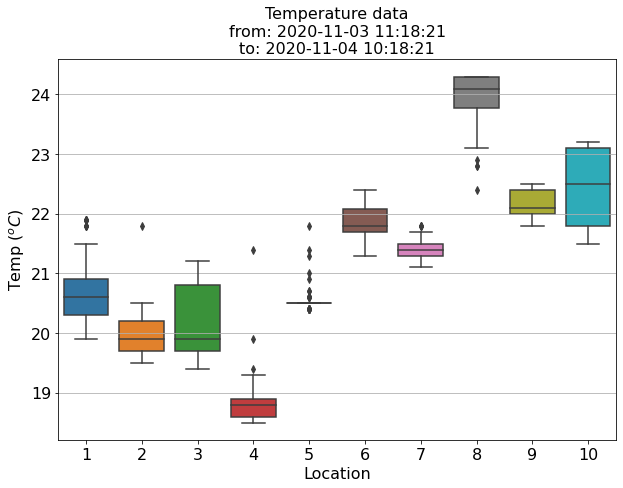

In [8]:
plt.figure(figsize=(10,7))
p1=sns.boxplot(
    x='Sensor', 
    y='Temp', 
    data=df_all
)


plt.title("Temperature data\n" + "from: " + str(start_time) + "\nto: "+ str(end_time), fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel('Location',fontsize=16)
plt.ylabel('Temp $(^{o}C)$',fontsize=16)

p1.yaxis.grid(True) # Hide the horizontal gridlines
p1.xaxis.grid(False) # Show the vertical gridlines

plt.savefig(str(datetime.date.today())+"_"+"figure-temp.png", 
            bbox_inches='tight')

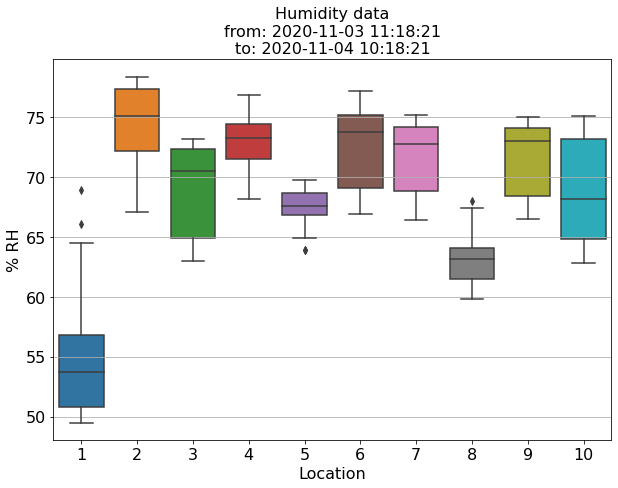

In [9]:
plt.figure(figsize=(10,7))
p1=sns.boxplot(
    x='Sensor', 
    y='RH', 
    data=df_all
)

# p1=sns.swarmplot(
#     x='Sensor', 
#     y='RH', 
#     data=df_all,
# )

plt.title("Humidity data\n" + "from: " + str(start_time) + "\nto: "+ str(end_time), fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel('Location',fontsize=16)
plt.ylabel('% RH',fontsize=16)

p1.yaxis.grid(True) # Hide the horizontal gridlines
p1.xaxis.grid(False) # Show the vertical gridlines

plt.savefig(str(datetime.date.today())+"_"+"figure-humd.png",
            bbox_inches='tight')

20.54


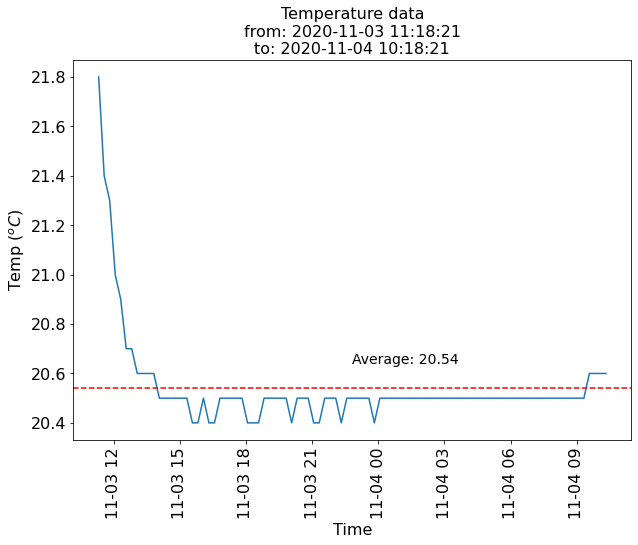

In [12]:
df1=df_all[df_all['Sensor'] == 5]

plt.figure(figsize=(10,7))

sns.lineplot(data=df1, x='DateTime', y='Temp')

plt.xticks(rotation='vertical')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel('Time',fontsize=16)
plt.ylabel('Temp $(^{o}C)$',fontsize=16)

plt.title("Temperature data\n" + "from: " + str(start_time) + "\nto: "+ str(end_time), fontsize=16)

plt.axhline(
    df1['Temp'].mean(), 
    ls='--',
    c='r'
)

plt.annotate("Average: "+str(round(df1['Temp'].mean(),2)),
             xy=(
                 #start_time,
                 df1['DateTime'].iloc[int(len(df1)/2)],
                 round(df1['Temp'].mean(),2)+0.1
             ),
             fontsize=14
            )

print(round(df1['Temp'].mean(),2))

67.58


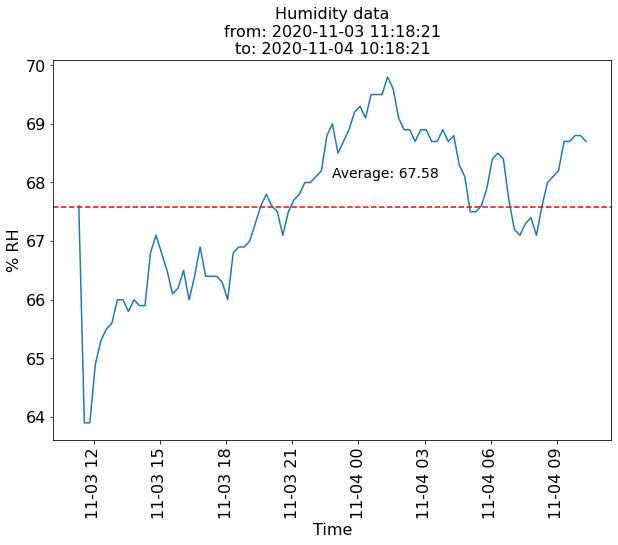

In [11]:
#plot timeseries

df1=df_all[df_all['Sensor'] == 5]

plt.figure(figsize=(10,7))

sns.lineplot(data=df1, x='DateTime', y='RH')

plt.xticks(rotation='vertical')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel('Time',fontsize=16)
plt.ylabel('% RH',fontsize=16)

plt.title("Humidity data\n" + "from: " + str(start_time) + "\nto: "+ str(end_time), fontsize=16)

plt.axhline(
    df1['RH'].mean(), 
    ls='--',
    c='r'
)

plt.annotate("Average: "+str(round(df1['RH'].mean(),2)),
             xy=(
                 #start_time,
                 df1['DateTime'].iloc[int(len(df1)/2)],
                 round(df1['RH'].mean(),2)+0.5
             ),
             fontsize=14
            )

print(round(df1['RH'].mean(),2))